Dataset:
          Math  Science  English  CS
Student                            
S1         78       85       92  88
S2         56       65       72  70
S3         90       88       95  96
S4         45       50       55  58
S5         70       75       78  80 

Subject statistics (Mean, SD):
          Mean  SD (sample)
Math     67.8        17.75
Science  72.6        15.53
English  78.4        16.20
CS       78.4        14.93 

Totals per student:
 Student
S1    343
S2    263
S3    369
S4    208
S5    303
dtype: int64 



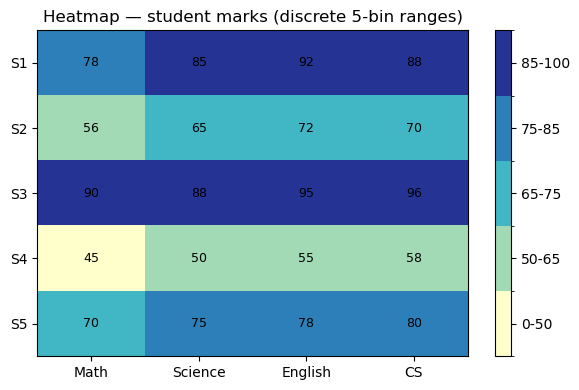

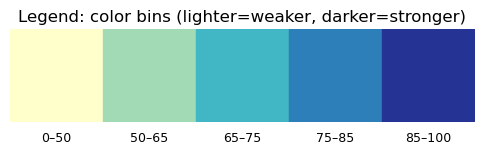

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# DATA
data = {
    "Student": ["S1", "S2", "S3", "S4", "S5"],
    "Math": [78, 56, 90, 45, 70],
    "Science": [85, 65, 88, 50, 75],
    "English": [92, 72, 95, 55, 78],
    "CS": [88, 70, 96, 58, 80]
}
df = pd.DataFrame(data).set_index("Student")

# STATS
means = df.mean()
sds = df.std(ddof=1)
totals = df.sum(axis=1)

print("Dataset:\n", df, "\n")
print("Subject statistics (Mean, SD):\n", pd.DataFrame({"Mean": means.round(2), "SD (sample)": sds.round(2)}), "\n")
print("Totals per student:\n", totals.round(2), "\n")

# BINS AND COLORMAP (use exact ranges/colors requested)
bins = [0, 50, 65, 75, 85, 100]
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N, clip=True)

# HEATMAP (matplotlib only)
plt.figure(figsize=(6,4))
im = plt.imshow(df.values, aspect='auto', cmap=cmap, norm=norm)
plt.xticks(ticks=np.arange(df.shape[1]), labels=df.columns)
plt.yticks(ticks=np.arange(df.shape[0]), labels=df.index)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(j, i, str(df.values[i,j]), ha='center', va='center', color='black', fontsize=9)
plt.title("Heatmap — student marks (discrete 5-bin ranges)")
cbar = plt.colorbar(im, boundaries=bins, ticks=[25,57.5,70,80,92.5])
cbar.set_ticklabels(['0-50','50-65','65-75','75-85','85-100'])
plt.tight_layout()
plt.show()

# LEGEND BOX (separate figure)
fig, ax = plt.subplots(figsize=(6,1.2))
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.axis('off')
for i, col in enumerate(colors):
    ax.add_patch(plt.Rectangle((i,0),1,1, color=col))
    ax.text(i+0.5, -0.1, f"{bins[i]}–{bins[i+1]}", ha='center', va='top', fontsize=9)
ax.set_title("Legend: color bins (lighter=weaker, darker=stronger)")
plt.show()
